# We are asked by the financial/operations department to build a forecasting model to predict sales of every exact order 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("DF.csv",delimiter =';',index_col='id',decimal = ',')

In [3]:
df.head()

,Type,exog1,exog2,BUSINESS PARTNER,ORDER NO.,SALES INVOICES,COST INVOICES,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs
id,,,,,,,,,,,,,
1,A,9.80,1750.0,AA LTD.,0001_XYZ,1.0,2.0,A&A Sp. z o.o.,Cezary Jaworski,apple,sweet,6211.66,3498.95
2,B,4.90,2856.0,AB LTD.,0002_XYZ,2.0,1.0,A&B Sp. z o.o.,Kamil Mazurek,apple,sweet,1532.02,-2979.62
3,B,32.27,3444.0,AB LTD.,0003_XYZ,1.0,NaN,A&C Sp. z o.o.,Alex Lewandowski,apple,sweet,1891.47,0.00
4,B,7.00,133.0,AB LTD.,0004_XYZ,1.0,NaN,A&C Sp. z o.o.,Alex Lewandowski,apple,sweet,410.20,0.00
5,B,24.50,24857.0,AB LTD.,0005_XYZ,1.0,NaN,A&C Sp. z o.o.,Alex Lewandowski,apple,sweet,1435.98,0.00


In [4]:
df.tail()

,Type,exog1,exog2,BUSINESS PARTNER,ORDER NO.,SALES INVOICES,COST INVOICES,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs
id,,,,,,,,,,,,,
3127,A,35.210,2674.0,CO LTD.,0003127_XYZ,NaN,NaN,A&D Sp. z o.o.,Konrad Szczepański,apple,sweet,0.0,0.0
3128,A,12.600,1358.0,CO LTD.,0003128_XYZ,NaN,NaN,A&D Sp. z o.o.,Konrad Szczepański,apple,sweet,0.0,0.0
3129,A,21.770,3850.0,GT LTD.,0003129_XYZ,NaN,NaN,A&D Sp. z o.o.,Klara Kowalska,apple,sweet,0.0,0.0
3130,A,290.710,23856.0,CO LTD.,0003130_XYZ,NaN,NaN,A&D Sp. z o.o.,Klara Kowalska,apple,sweet,0.0,0.0
3131,NaN,182.665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.iloc[:-1]

# GENERAL ANALYSIS

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3130 entries, 1 to 3130
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              3130 non-null   object 
 1   exog1             3130 non-null   float64
 2   exog2             3130 non-null   float64
 3   BUSINESS PARTNER  3053 non-null   object 
 4   ORDER NO.         3130 non-null   object 
 5   SALES INVOICES    2381 non-null   float64
 6   COST INVOICES     1708 non-null   float64
 7   CLIENT            3130 non-null   object 
 8   EMPLOYEE          3086 non-null   object 
 9   Product           3130 non-null   object 
 10  CATEGORY          3130 non-null   object 
 11  sales             3130 non-null   float64
 12  costs             3130 non-null   float64
dtypes: float64(6), object(7)
memory usage: 342.3+ KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
exog1,3130.0,58.358530,884.006782,0.00,10.4300,26.705,58.1525,49427.00
exog2,3130.0,12252.889457,16125.153108,0.00,2674.0000,6643.000,15190.0000,177940.00
SALES INVOICES,2381.0,1.289374,0.538291,1.00,1.0000,1.000,2.0000,8.00
COST INVOICES,1708.0,1.726581,0.916334,1.00,1.0000,2.000,2.0000,9.00
sales,3130.0,10073.093840,15847.636740,0.00,198.8525,4716.425,13311.8300,208638.64
costs,3130.0,6774.115166,13157.790368,-17766.14,0.0000,2959.215,9094.3300,441427.00


<AxesSubplot:ylabel='id'>

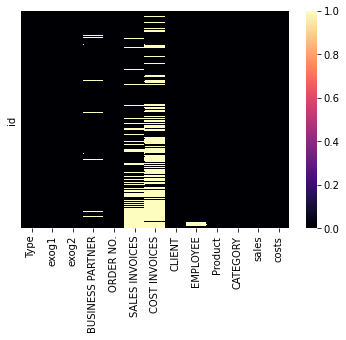

In [8]:
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False)

In [9]:
#calculating % of null values in every column
columns = df.columns.values
NullPerc = {}
for i in range(0,len(columns)):
    NullPerc[columns[i]]=round(sum(df[columns[i]].isnull())/len(df[columns[i]]),2)
NullPerc    

{'Type': 0.0,
 'exog1': 0.0,
 'exog2': 0.0,
 'BUSINESS PARTNER': 0.02,
 'ORDER NO.': 0.0,
 'SALES INVOICES': 0.24,
 'COST INVOICES': 0.45,
 'CLIENT': 0.0,
 'EMPLOYEE': 0.01,
 'Product': 0.0,
 'CATEGORY': 0.0,
 'sales': 0.0,
 'costs': 0.0}

# handling with null values

## 1) BUSINESS PARTNER 

In [10]:
df[df['BUSINESS PARTNER'].isnull()]

,Type,exog1,exog2,BUSINESS PARTNER,ORDER NO.,SALES INVOICES,COST INVOICES,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs
id,,,,,,,,,,,,,
8,B,23.66,2457.0,NaN,0008_XYZ,1.0,NaN,A&C Sp. z o.o.,Alex Lewandowski,apple,sweet,1384.60,0.00
48,B,25.90,3101.0,NaN,00048_XYZ,2.0,1.0,A&N Sp. z o.o.,Henryk Szczepański,apple,sweet,16773.54,12729.57
80,B,21.35,3199.0,NaN,00080_XYZ,1.0,NaN,A&C Sp. z o.o.,Alex Lewandowski,apple,sweet,1407.00,0.00
91,B,6.23,819.0,NaN,00091_XYZ,3.0,1.0,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,9913.40,6964.44
187,B,2.94,1211.0,NaN,000187_XYZ,2.0,1.0,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,9033.85,6916.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2923,B,46.90,9100.0,NaN,0002923_XYZ,1.0,1.0,F&V Sp. z o.o.,Rafał Sikorska,apple,sweet,9591.89,2100.00
2967,B,12.39,1274.0,NaN,0002967_XYZ,NaN,NaN,A&C Sp. z o.o.,Kamil Mazurek,apple,sweet,0.00,0.00
2971,B,7.00,1029.0,NaN,0002971_XYZ,NaN,NaN,A&C Sp. z o.o.,Kamil Mazurek,apple,sweet,0.00,0.00


### I assumed that it's high probability that in company is used the same business partner for the most common combination of "CLIENT"and "PRODUCT" values 

In [11]:
fill_BP = df.groupby(['BUSINESS PARTNER','CLIENT','Product']).count().reset_index().iloc[:,0:4]\
.sort_values(by='Type',ascending=False)
fill_BP

,BUSINESS PARTNER,CLIENT,Product,Type
17,AB LTD.,A&C Sp. z o.o.,apple,469
18,AB LTD.,A&D Sp. z o.o.,apple,173
74,AD LTD.,A&D Sp. z o.o.,apple,150
112,AF LTD.,A&D Sp. z o.o.,apple,108
154,AG LTD.,A&D Sp. z o.o.,apple,102
...,...,...,...,...
321,AN LTD.,G&J Sp. z o.o.,apple,1
322,AN LTD.,G&K Sp. z o.o.,apple,1
323,AN LTD.,I&W Sp. z o.o.,apple,1
329,AO LTD.,C&P Sp. z o.o.,apple,1


In [12]:
for i in range(1,len(df)):
    if pd.isnull(df['BUSINESS PARTNER'][i]):
        df['BUSINESS PARTNER'][i]=fill_BP[(fill_BP['CLIENT']==df['CLIENT'][i])&
                                          (fill_BP['Product']==df['Product'][i])].iloc[0]['BUSINESS PARTNER']

<ipython-input-12-a61097efb7a9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BUSINESS PARTNER'][i]=fill_BP[(fill_BP['CLIENT']==df['CLIENT'][i])&


## 2) SALES & COST INVOICES since we are trying to forecast sales and cost I've decided not to teach my model on "guessed" data

In [13]:
df[df['SALES INVOICES'].isnull()]['sales'].sum()

0.0

In [14]:
print(round(df[df['SALES INVOICES'].isnull()]['sales'].count()/len(df),2),'% of data will be dropped due to lack of issued sales')

0.24 % of data will be dropped due to lack of issued sales


In [15]:
df[df['COST INVOICES'].isnull()]['costs'].sum() # it shows that this column has missmatched data (there are costs but null cost invoice)

2377780.0199999996

In [16]:
df = df[(df['SALES INVOICES'].isnull()==False)]
df = df[df['costs']!=0]

In [17]:
df['COST INVOICES'].fillna(1,inplace=True)

# descriptive analysis

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1916 entries, 1 to 3123
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Type              1916 non-null   object 
 1   exog1             1916 non-null   float64
 2   exog2             1916 non-null   float64
 3   BUSINESS PARTNER  1916 non-null   object 
 4   ORDER NO.         1916 non-null   object 
 5   SALES INVOICES    1916 non-null   float64
 6   COST INVOICES     1916 non-null   float64
 7   CLIENT            1916 non-null   object 
 8   EMPLOYEE          1916 non-null   object 
 9   Product           1916 non-null   object 
 10  CATEGORY          1916 non-null   object 
 11  sales             1916 non-null   float64
 12  costs             1916 non-null   float64
dtypes: float64(6), object(7)
memory usage: 209.6+ KB


<AxesSubplot:>

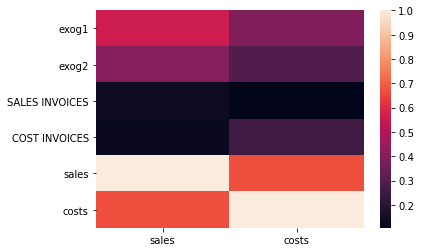

In [19]:
num_cols=['exog1', 'exog2','SALES INVOICES', 'COST INVOICES', 'sales', 'costs']
sns.heatmap(df[num_cols].corr()[['sales','costs']])

In [20]:
df.corr()[['sales','costs']]

,sales,costs
exog1,0.559285,0.398114
exog2,0.407731,0.294053
SALES INVOICES,0.139689,0.105657
COST INVOICES,0.128486,0.254655
sales,1.000000,0.670066
costs,0.670066,1.000000


In [21]:
df.drop(columns=['SALES INVOICES','COST INVOICES'],inplace=True,axis=1)

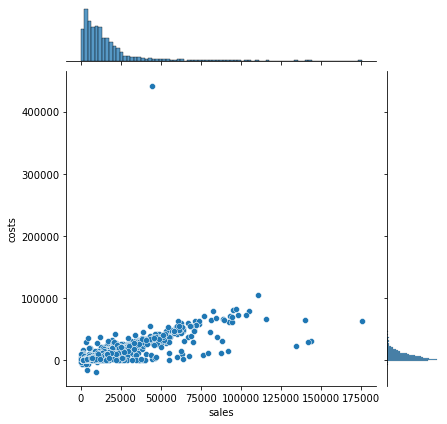

In [22]:
sns.jointplot(data=df,x='sales',y='costs')

In [23]:
df['gross margin'] = df['sales']-df['costs']

In [24]:
df['perc. margin'] = round(df['gross margin']/df['sales'],2)

In [25]:
df.head(5)

,Type,exog1,exog2,BUSINESS PARTNER,ORDER NO.,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs,gross margin,perc. margin
id,,,,,,,,,,,,,
1,A,9.80,1750.0,AA LTD.,0001_XYZ,A&A Sp. z o.o.,Cezary Jaworski,apple,sweet,6211.66,3498.95,2712.71,0.44
2,B,4.90,2856.0,AB LTD.,0002_XYZ,A&B Sp. z o.o.,Kamil Mazurek,apple,sweet,1532.02,-2979.62,4511.64,2.94
11,B,17.50,1127.0,AB LTD.,00011_XYZ,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,6737.29,4377.87,2359.42,0.35
16,A,9.24,6398.0,AC LTD.,00016_XYZ,A&F Sp. z o.o.,Leonardo Lewandowski,apple,sweet,12522.37,8499.96,4022.41,0.32
18,A,21.00,13216.0,AD LTD.,00018_XYZ,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,3737.58,3542.98,194.60,0.05


# after meeting with operational managers it's said that the perc. margin should not exceed 40% and the loss on a single order has never been higher than 5000

In [26]:
df=df[(df['perc. margin']<=0.40) & (df['gross margin']>=-5000) ]

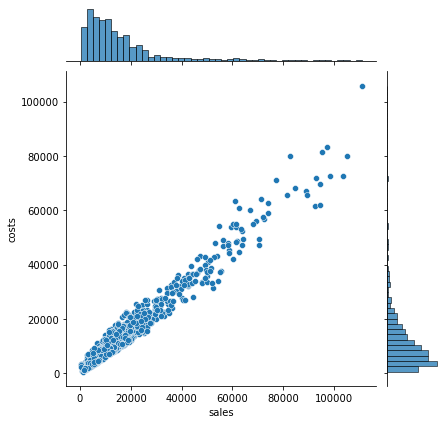

In [27]:
sns.jointplot(data=df,x='sales',y='costs')

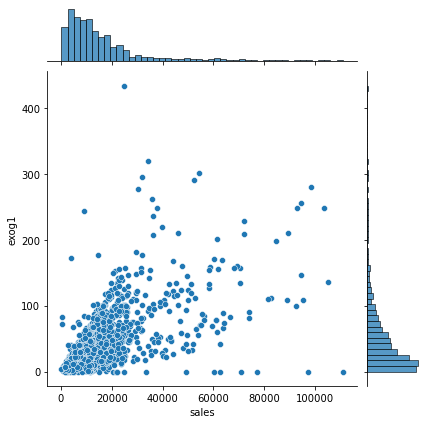

In [28]:
sns.jointplot(data=df,x='sales',y='exog1')

# Czy ja tutaj nie cheatuje ? Nie powinienem tego robić już na testowej bazie danych ? 

Since exog1,exog2 is the most correlated with sales I've decided that the "0" values will be prognosed by a median in sales groups

In [29]:
sales_groups = list(range(0,int(max(df['sales'])),10000))
sales_groups

[0,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 110000]

In [30]:
#SALES GROUPS
df['sales_groups'] = sales_groups[0]
for i in range(1,len(df)):
    for a in range(0,len(sales_groups)):
        if df['sales'].iloc[i] < sales_groups[a]:
            df['sales_groups'].iloc[i] = sales_groups[a]
            break

C:\Users\Cezary.Sosnowski.CZAREK\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [31]:
df.index

Int64Index([  11,   16,   18,   19,   20,   21,   22,   23,   24,   25,
            ...
            2720, 2808, 2821, 2834, 2835, 2855, 2951, 2954, 2956, 3123],
           dtype='int64', name='id', length=1296)

In [32]:
# TA PĘTLA DZIAŁA POPRAWNIE JAK JEST ODPALONA DWA RAZY COŚ TU NIE GRA PRAWDOPODOBNIE Z "BREAK"
exog_1_2 = df.groupby(by='sales_groups').median()[['exog1','exog2']]
for x in range(0,3):
    for i in range(0,len(df)):
        for a in range(0,len(exog_1_2)):
            if df['exog1'].iloc[i] ==0:
                if df['sales'].iloc[i]>exog_1_2.index[-1]:
                    df['exog1'].iloc[i]=exog_1_2['exog1'].iloc[-1]
                    break 
                elif df['sales'].iloc[i]<exog_1_2.index[a+1]:
                    df['exog1'].iloc[i]=exog_1_2['exog1'].iloc[a]
                    break
            if df['exog2'].iloc[i] ==0:
                if df['sales'].iloc[i]>exog_1_2.index[-1]:
                    df['exog2'].iloc[i]=exog_1_2['exog2'].iloc[-1]
                    break
                elif df['sales'].iloc[i]<exog_1_2.index[a+1]:
                    df['exog2'].iloc[i]=exog_1_2['exog2'].iloc[a]
                    break     

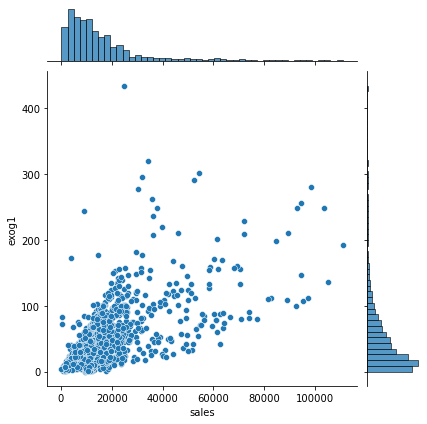

In [33]:
sns.jointplot(data=df,x='sales',y='exog1')

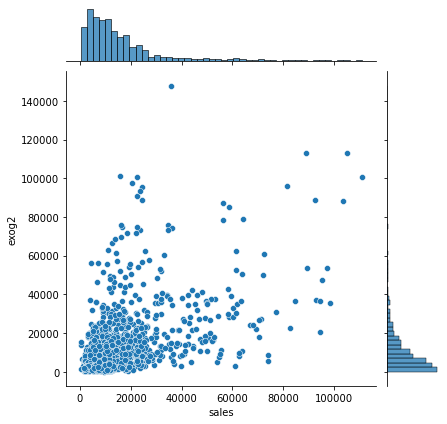

In [34]:
sns.jointplot(data=df,x='sales',y='exog2')

# 

In [35]:
df.head()

,Type,exog1,exog2,BUSINESS PARTNER,ORDER NO.,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs,gross margin,perc. margin,sales_groups
id,,,,,,,,,,,,,,
11,B,17.50,1127.0,AB LTD.,00011_XYZ,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,6737.29,4377.87,2359.42,0.35,0
16,A,9.24,6398.0,AC LTD.,00016_XYZ,A&F Sp. z o.o.,Leonardo Lewandowski,apple,sweet,12522.37,8499.96,4022.41,0.32,20000
18,A,21.00,13216.0,AD LTD.,00018_XYZ,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,3737.58,3542.98,194.60,0.05,10000
19,A,52.71,24283.0,AD LTD.,00019_XYZ,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,8852.90,5853.05,2999.85,0.34,10000
20,A,53.83,4011.0,AD LTD.,00020_XYZ,A&G Sp. z o.o.,Cezary Jaworski,apple,sweet,20446.02,18816.35,1629.67,0.08,30000


# From this point we have a clean database which can be used to make a prediction

In [36]:
df= df.reset_index()

In [37]:
df = df.drop(columns=['ORDER NO.','perc. margin','sales_groups','gross margin','id'])
df

,Type,exog1,exog2,BUSINESS PARTNER,CLIENT,EMPLOYEE,Product,CATEGORY,sales,costs
0,B,17.50,1127.0,AB LTD.,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,6737.29,4377.87
1,A,9.24,6398.0,AC LTD.,A&F Sp. z o.o.,Leonardo Lewandowski,apple,sweet,12522.37,8499.96
2,A,21.00,13216.0,AD LTD.,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,3737.58,3542.98
3,A,52.71,24283.0,AD LTD.,A&D Sp. z o.o.,Jakub Makowski,apple,sweet,8852.90,5853.05
4,A,53.83,4011.0,AD LTD.,A&G Sp. z o.o.,Cezary Jaworski,apple,sweet,20446.02,18816.35
...,...,...,...,...,...,...,...,...,...,...
1291,A,0.63,770.0,CF LTD.,A&D Sp. z o.o.,Andrzej Szczepański,apple,sweet,10760.19,10260.74
1292,A,114.03,12600.0,CV LTD.,A&J Sp. z o.o.,Korneliusz Rutkowski,apple,sweet,18827.90,12389.37
1293,A,99.33,2002.0,CV LTD.,A&I Sp. z o.o.,Korneliusz Rutkowski,apple,sweet,16379.72,10792.18
1294,A,40.25,2730.0,CV LTD.,A&J Sp. z o.o.,Korneliusz Rutkowski,apple,sweet,7133.91,4373.18


In [39]:
y = df['sales'].values
X = df[['exog1','exog2','Type','BUSINESS PARTNER','CLIENT','EMPLOYEE','Product','CATEGORY']].values

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[2,3,4,5,6,7])],remainder='passthrough')
X=ct.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42)

In [42]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred= regressor.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
RMSE = np.sqrt(MSE)
print("R squared value: ", r2)
print("Root Mean Squared Error : ", RMSE)
print("Mean Absolute Error : ", MAE)

R squared value:  0.6779948423398119
Root Mean Squared Error :  8855.928707223347
Mean Absolute Error :  5663.835136889079


In [45]:
print(sum(y_pred))
print(sum(y_test))
print("linear regression model has forcasted ",round(sum(y_test)-sum(y_pred),2),"PLN less sales than it was in test set")

6441862.955231451
6814023.930000003
linear regression model has forcasted  372160.97 PLN less sales than it was in test set


# POLYNOMIAL REGRESSION

In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression()

In [47]:
y2_pred = lin_reg_2.predict(poly_reg.fit_transform(X_test))

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
MSE_2=mean_squared_error(y_test,y2_pred)
MAE_2=mean_absolute_error(y_test,y2_pred)
r2_2=r2_score(y_test,y2_pred)
RMSE_2 = np.sqrt(MSE_2)
print("R squared value: ", r2_2)
print("Root Mean Squared Error : ", RMSE_2)
print("Mean Absolute Error : ", MAE_2)

R squared value:  0.8559126866663017
Root Mean Squared Error :  5924.007087820662
Mean Absolute Error :  4102.992597563053


In [49]:
print(sum(y2_pred))
print(sum(y_test))
print("POLYNOMIAL REGRESSION model has forcasted ",round(sum(y_test)-sum(y2_pred),2),"PLN less sales than it was in test set")

6670979.995262054
6814023.930000003
POLYNOMIAL REGRESSION model has forcasted  143043.93 PLN less sales than it was in test set


# DECISSION TREE

In [50]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
y4_pred = regressor.predict(X_test)

In [52]:
MSE_4=mean_squared_error(y_test,y4_pred)
MAE_4=mean_absolute_error(y_test,y4_pred)
r2_4=r2_score(y_test,y4_pred)
RMSE_4 = np.sqrt(MSE_4)
print("R squared value: ", r2_4)
print("Root Mean Squared Error : ", RMSE_4)
print("Mean Absolute Error : ", MAE_4)

R squared value:  0.5871347345479636
Root Mean Squared Error :  10027.827884284217
Mean Absolute Error :  5665.603206018518


In [53]:
print(sum(y4_pred))
print(sum(y_test))
print("DECISSION TREE model has forcasted ",round(sum(y_test)-sum(y4_pred),2),"PLN less sales than it was in test set")

5983210.834999999
6814023.930000003
DECISSION TREE model has forcasted  830813.1 PLN less sales than it was in test set


# RANDOM FOREST REGRESSION

In [54]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 30,random_state = 0)
regressor.fit(X_train,y_train)

RandomForestRegressor(n_estimators=30, random_state=0)

In [55]:
y5_pred = regressor.predict(X_test)

In [56]:
MSE_5=mean_squared_error(y_test,y5_pred)
MAE_5=mean_absolute_error(y_test,y5_pred)
r2_5=r2_score(y_test,y5_pred)
RMSE_5 = np.sqrt(MSE_5)
print("R squared value: ", r2_5)
print("Root Mean Squared Error : ", RMSE_5)
print("Mean Absolute Error : ", MAE_5)

R squared value:  0.636703996671068
Root Mean Squared Error :  9406.607169402483
Mean Absolute Error :  5357.926970181756


In [57]:
print(sum(y5_pred))
print(sum(y_test))
print("RANDOM FOREST REGRESSION model has forcasted ",round(sum(y_test)-sum(y4_pred),2),"PLN less sales than it was in test set")

5939480.659103699
6814023.930000003
RANDOM FOREST REGRESSION model has forcasted  830813.1 PLN less sales than it was in test set


 # SUPPORT VECTOR REGRESSION

In [58]:
y_test = y_test.reshape(len(y_test),1)
y_train = y_train.reshape(len(y_train),1)

In [59]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler(with_mean=False)
sc_y = StandardScaler(with_mean=False)
X_train[:,0:2] = sc_X.fit_transform(X_train[:,0:2]) 
X_test[:,0:2] = sc_X.transform(X_test[:,0:2]) # TUTAJ TRZEBA COŚ ZMIENIĆ
y_train = sc_y.fit_transform(y_train)
y_test = sc_y.transform(y_test) # to chyba nie jest w ogóle potrzebne

In [60]:
print('y test: ', y_test[0])
print('x test: ', print(X_train[0,0:2].toarray()))

y test:  [1.14179321]
[[2.94390583 0.        ]]
x test:  None


In [61]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf',C=5, gamma='auto')
regressor.fit(X_train,y_train)

C:\Users\Cezary.Sosnowski.CZAREK\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=5, gamma='auto')

In [62]:
y3_pred = sc_y.inverse_transform(regressor.predict(X_test))
y_test = sc_y.inverse_transform(y_test)

In [63]:
MSE_3=mean_squared_error(y_test,y3_pred)
MAE_3=mean_absolute_error(y_test,y3_pred)
r2_3=r2_score(y_test,y3_pred)
RMSE_3 = np.sqrt(MSE_3)
print("R squared value: ", r2_3)
print("Root Mean Squared Error : ", RMSE_3)
print("Mean Absolute Error : ", MAE_3)

R squared value:  0.0893661963503335
Root Mean Squared Error :  14892.739107476506
Mean Absolute Error :  9580.044309557541


# VISUALISATION OF RESULTS

In [64]:
models = {'SLR':[r2,MAE,RMSE],'PR':[r2_2,MAE_2,RMSE_2], 'SVR':[r2_3,MAE_3,RMSE_3],'DT':[r2_4,MAE_4,RMSE_4],'RFR':[r2_5,MAE_5,RMSE_5]}
models = pd.DataFrame(models,index=['r2','MAE','RMSE'])
models = models.T.sort_values(by='r2',ascending=False)
models

,r2,MAE,RMSE
PR,0.855913,4102.992598,5924.007088
SLR,0.677995,5663.835137,8855.928707
RFR,0.636704,5357.926970,9406.607169
DT,0.587135,5665.603206,10027.827884
SVR,0.089366,9580.044310,14892.739107


Text(0.5, 1.0, 'VALUE OF r2')

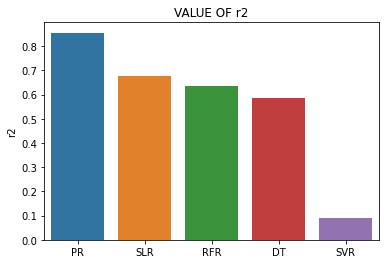

In [65]:
fig = sns.barplot(x=models.index, y="r2", data=models)
fig.set_title('VALUE OF r2')

In [66]:
slr_mistakes = [y_test[i][0] - y_pred[i] for i in range(0,len(y_test))]
pr_mistakes = [y_test[i][0] - y2_pred[i] for i in range(0,len(y_test))]
svr_mistakes = [y_test[i][0] - y3_pred[i] for i in range(0,len(y_test))]
dt_mistakes = [y_test[i][0] - y4_pred[i] for i in range(0,len(y_test))]
rfr_mistakes = [y_test[i][0] - y5_pred[i] for i in range(0,len(y_test))]

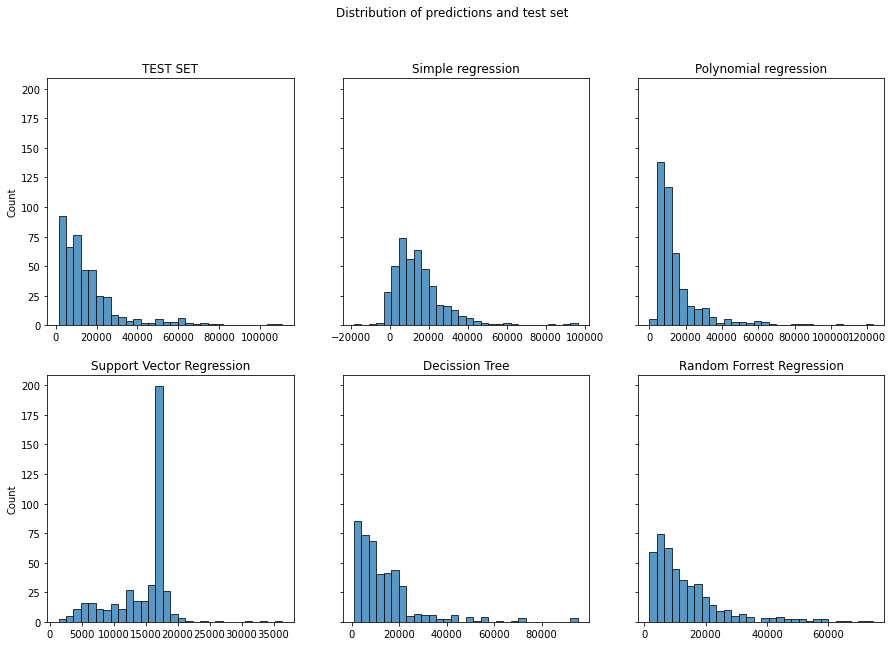

In [67]:
n_bins=30
fig, axes = plt.subplots(2, 3,figsize=(15, 10), sharey=True)
fig.suptitle('Distribution of predictions and test set')

sns.histplot(ax=axes[0,0],data = y_test,bins=n_bins)
axes[0,0].set_title('TEST SET')
sns.histplot(ax=axes[0,1],data = y_pred,bins=n_bins)
axes[0,1].set_title('Simple regression')
sns.histplot(ax=axes[0,2],data = y2_pred,bins=n_bins)
axes[0,2].set_title('Polynomial regression')
sns.histplot(ax=axes[1,0],data = y3_pred,bins=n_bins)
axes[1,0].set_title('Support Vector Regression')
sns.histplot(ax=axes[1,1],data = y4_pred,bins=n_bins)
axes[1,1].set_title('Decission Tree')
sns.histplot(ax=axes[1,2],data = y5_pred,bins=n_bins)
axes[1,2].set_title('Random Forrest Regression')
axes[0,0].get_legend().remove()

# we can assume that the polynomial regression model should not behave as over/under fitted and is the most accurate. It can be used to make a future predictions